In [ ]:
!pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics,model_selection,ensemble,linear_model,tree,neighbors
from sklearn.preprocessing import StandardScaler,LabelBinarizer
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression,Ridge,ElasticNet
from sklearn.ensemble import RandomTreesEmbedding,RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
#Gerekli kutuphanelerin yuklenilmesi

In [ ]:
df = pd.read_csv('/content/Melbourne_housing_FULL.csv')
df.head()
#Indirilen veri setinin Colab`a yuklenilmesi ve ilk 5 satirin gosterilmesi

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
print(f'Shape    :{df.shape}\n'
      f'Size     :{df.size}\n'
      f'Dimension:{df.ndim}')
#34857 satirdan 21 degiskenden olusuyor
#Iki boyutlu bir veri seti

Shape    :(34857, 21)
Size     :731997
Dimension:2


In [ ]:
df.isnull().sum()
#Pek cok missing value var

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
df.duplicated().sum()
#duplice olan verimiz var

1

In [ ]:
df.loc[df.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()
#Artik duplicate olan verimiz yok

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34856.0,3.031013e+00,0.969947,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34855.0,1.118481e+01,6.788952,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34855.0,3.116062e+03,109.025437,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26639.0,3.084650e+00,0.980708,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26630.0,1.624747e+00,0.724177,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26128.0,1.728835e+00,1.010789,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23046.0,5.936072e+02,3398.915462,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13741.0,1.602516e+02,401.281270,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15550.0,1.965288e+03,37.328340,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [ ]:
df.nunique()
#kac essiz deger olduguna bakiyoruz

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [ ]:
cat_cols = ['Regionname','Type','Method''Suburb','Address','SellerG','CouncilArea']
num_cols = ['Propertycount','Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude','Postcode','Distance','Date','Price','Rooms','Bedroom2','Bathroom','Car']

<Axes: ylabel='BuildingArea'>

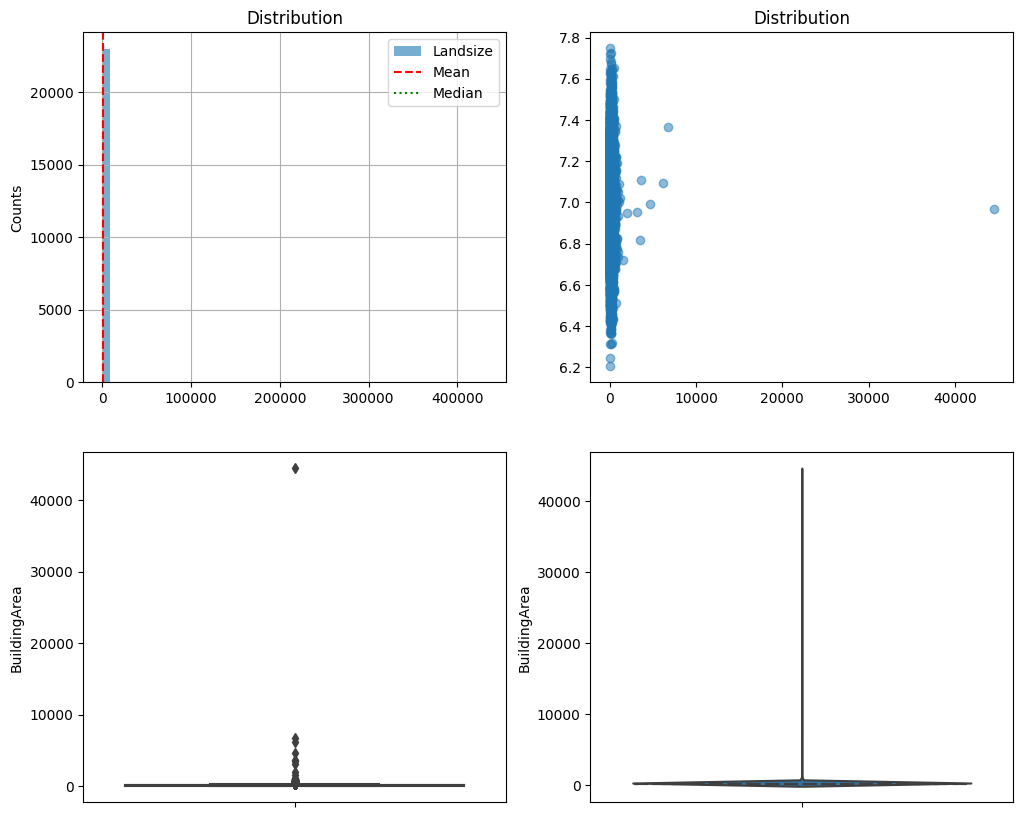

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df['Landsize'].hist(bins=50, label='Landsize', alpha=0.6)
plt.axvline(np.mean(df['Landsize']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df['Landsize']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Distribution")
plt.legend()
plt.subplot(2, 2, 2)
plt.scatter(df['BuildingArea'], np.random.normal(7, 0.2, size=df.shape[0]), alpha=0.5)
plt.title("Distribution")

plt.subplot(2, 2, 3)
sns.boxplot(y="BuildingArea", data=df)

plt.subplot(2, 2, 4)
sns.violinplot(y="BuildingArea", data=df, inner="quartile", bw=0.2)
#Landsize ve BuildingArea dagilim grafikleri

In [ ]:
from scipy.stats import norm
from scipy.stats import multivariate_normal as mn

def z_score(df, threshold=1):
    mean, std = np.mean(df), np.std(df)
    z_score = np.abs((df - mean) / std)
    good = z_score < threshold
    print(f"z-score of {threshold} corresponds to a prob of {100 * 2 * norm.sf(3):0.2f}%")
    print(f"Rejection {(~good).sum()} points")
    return good
    #Z-score ile outlier kaldirma

In [ ]:
z_score(df['Landsize'], threshold=2).sum()

z-score of 2 corresponds to a prob of 0.27%
Rejection 11883 points


22973

In [ ]:
z_score(df['BuildingArea'], threshold=2).sum()

z-score of 2 corresponds to a prob of 0.27%
Rejection 21129 points


13727

z-score of 2 corresponds to a prob of 0.27%
Rejection 11883 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 11853 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 11851 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 11833 points


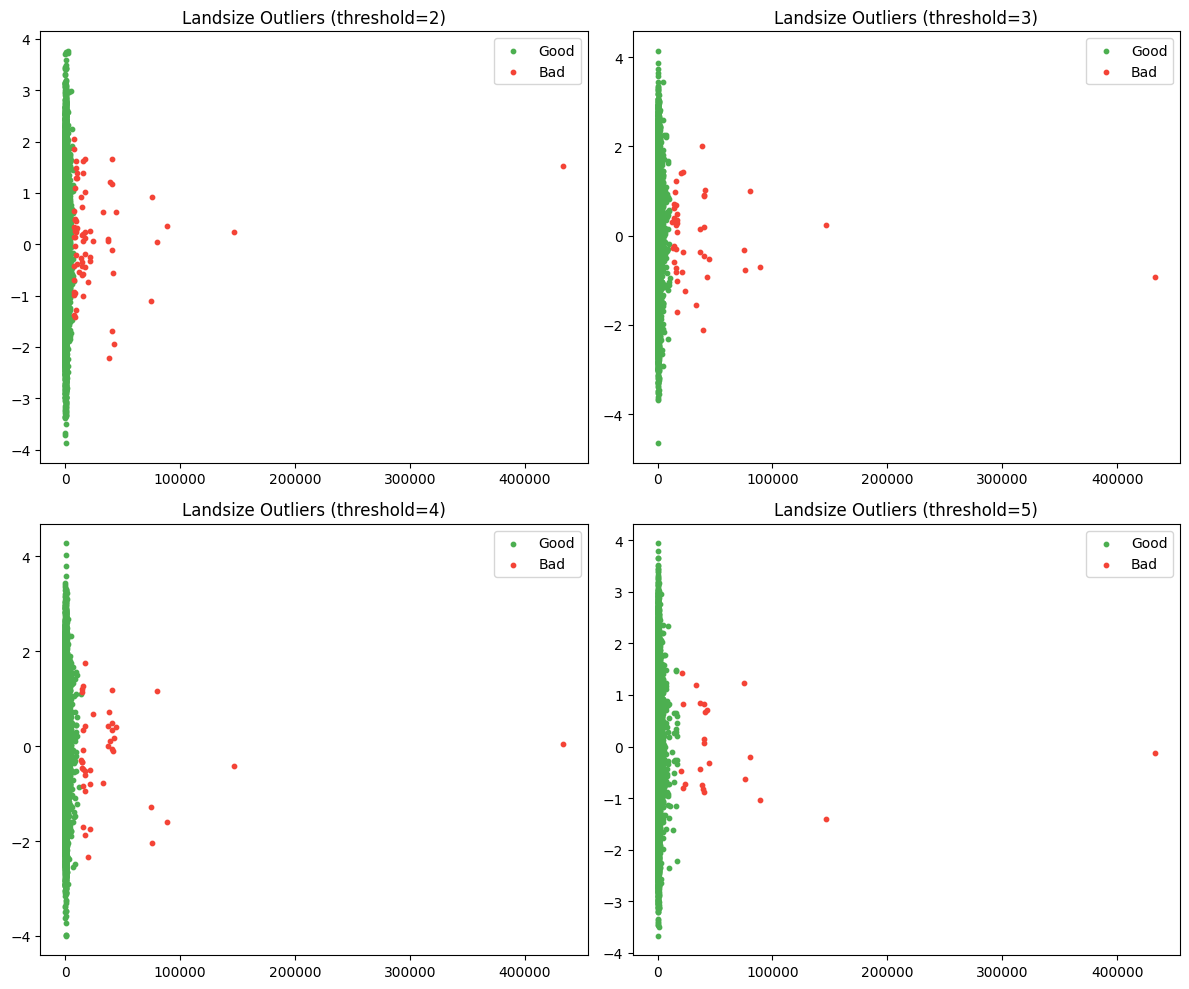

In [ ]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=df.shape[0])
    good = z_score(df['Landsize'], threshold=threshold)
    plt.scatter(df['Landsize'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(df['Landsize'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"Landsize Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 21129 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 21124 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 21123 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 21122 points


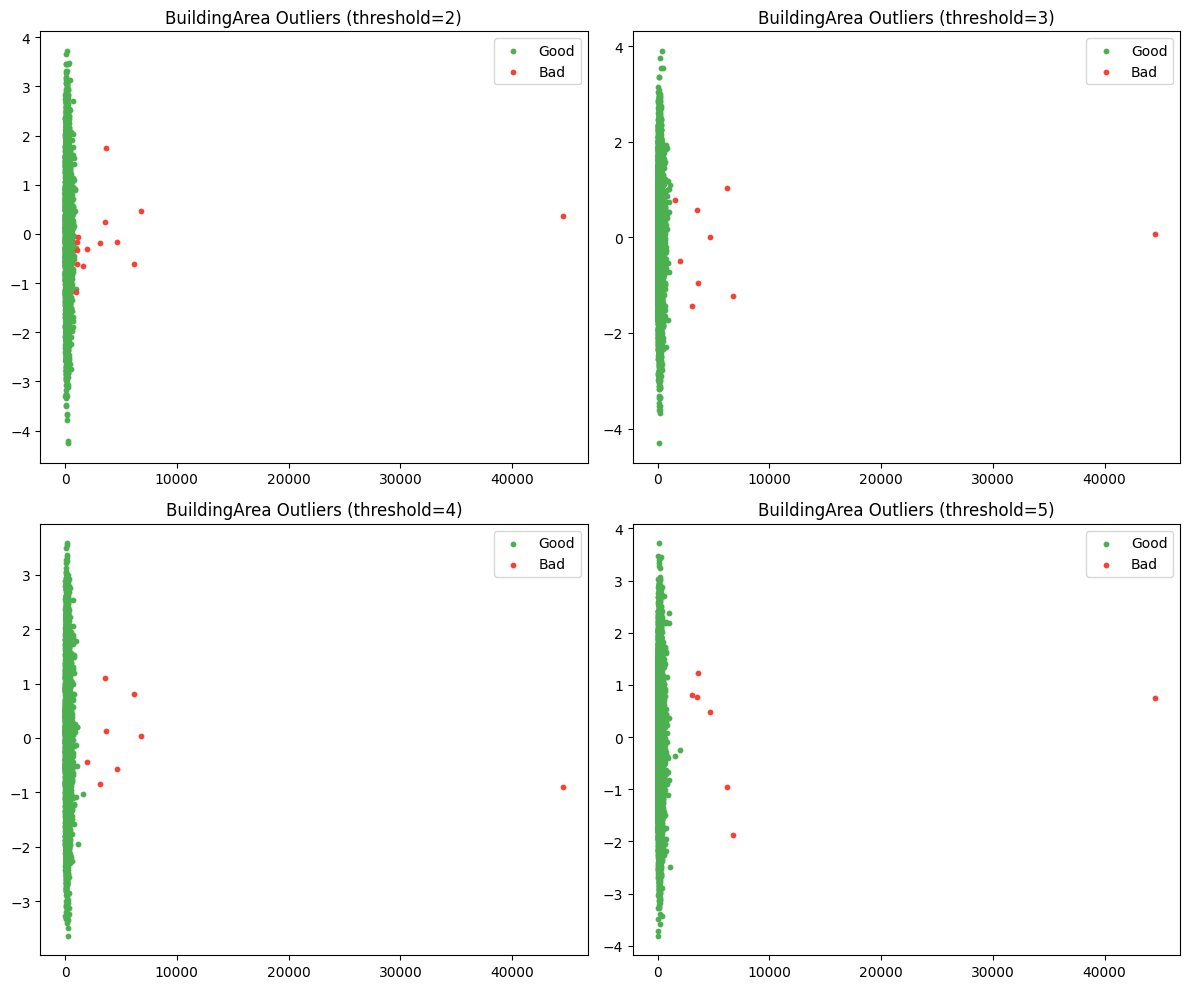

In [ ]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=df.shape[0])
    good = z_score(df['BuildingArea'], threshold=threshold)
    plt.scatter(df['BuildingArea'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(df['BuildingArea'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"BuildingArea Outliers (threshold={threshold})")

plt.tight_layout()

In [ ]:
column_with_missing_values1 = 'Type'
mode_value = df[column_with_missing_values1].mode()[0]
df[column_with_missing_values1].fillna(mode_value, inplace=True)
column_with_missing_values2 = 'Method'
mode_value = df[column_with_missing_values2].mode()[0]
df[column_with_missing_values2].fillna(mode_value, inplace=True)
column_with_missing_values3 = 'Regionname'
mode_value = df[column_with_missing_values3].mode()[0]
df[column_with_missing_values3].fillna(mode_value, inplace=True)
print(df[column_with_missing_values1].isnull().sum())
print(df[column_with_missing_values2].isnull().sum())
print(df[column_with_missing_values3].isnull().sum())
#Kategorik veriler icin Mode Imputation yapildi

0
0
0


In [ ]:
numerical_missing = ['Bathroom', 'Car',"Price", "Landsize", "BuildingArea", "YearBuilt",'Bedroom2','Propertycount','Longtitude',"Lattitude", "Distance", "Postcode"]
for column in numerical_missing:
    df[column] = df[column].fillna(df[column].median())
#Numeric olan bos degerleri doldurma ve kontrol
print(df[numerical_missing].isnull().sum())

Bathroom         0
Car              0
Price            0
Landsize         0
BuildingArea     0
YearBuilt        0
Bedroom2         0
Propertycount    0
Longtitude       0
Lattitude        0
Distance         0
Postcode         0
dtype: int64


In [ ]:
print(df[df['CouncilArea'].isnull()])
#Hangi satirlarin bos oldugunu gorme

            Suburb           Address  Rooms Type     Price Method SellerG  \
18523    Footscray  2/16 Stafford St      2    u  710000.0      S     Jas   
26888   Camberwell   2/3 Kingsley St      2    h  825000.0     VB  Jellis   
29483  Fawkner Lot      1/3 Brian St      3    h  616000.0     SP    Brad   

             Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
18523  15/07/2017       5.1    3011.0  ...       2.0  2.0     521.0   
26888  11/11/2017       7.7    3124.0  ...       2.0  2.0     521.0   
29483   6/01/2018      10.3    3103.0  ...       2.0  2.0     521.0   

       BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
18523         136.0     1970.0          NaN  -37.8076    145.0078   
26888         136.0     1970.0          NaN  -37.8076    145.0078   
29483         136.0     1970.0          NaN  -37.8076    145.0078   

                  Regionname Propertycount  
18523  Southern Metropolitan        6763.0  
26888  Southern Metropolitan        676

In [ ]:
df.dropna(subset = ["CouncilArea"], inplace=True)
#Sutunu bos olan satiri silme burada mean/median kullanamadik cunku string deger var

In [ ]:
print(df['CouncilArea'].isnull().sum())

0


<ipython-input-56-0f40db6cd84e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


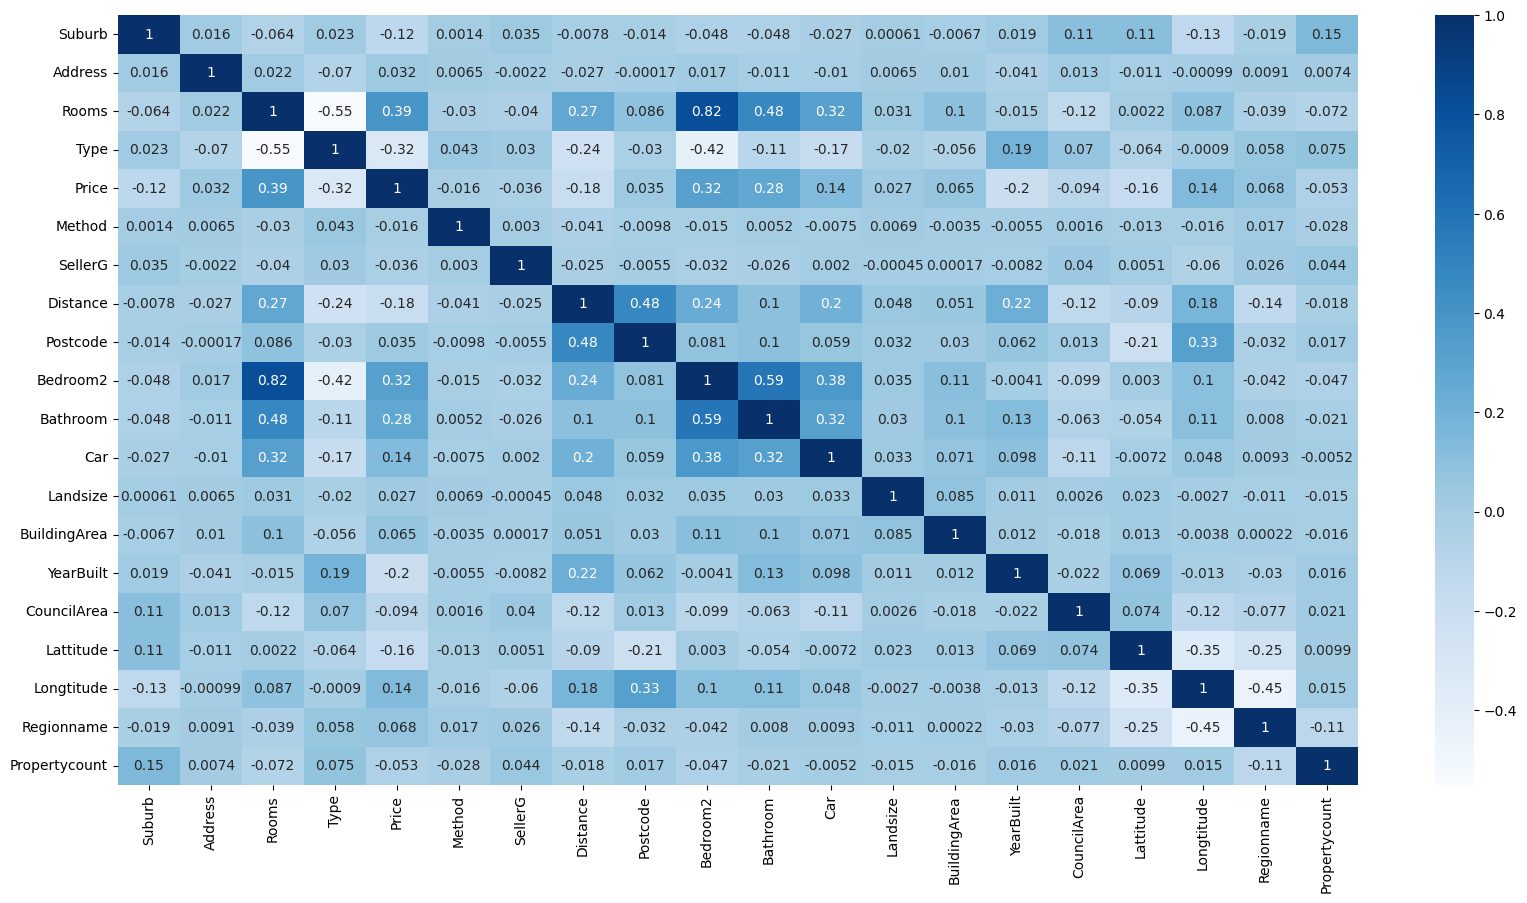

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True);
#Correlation Matrix

In [ ]:
#Kategorik veriler icin Label Encoding uygulama
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Regionname']= label_encoder.fit_transform(df['Regionname'])
df['Type']= label_encoder.fit_transform(df['Type'])
df['Method']= label_encoder.fit_transform(df['Method'])
df['Suburb']= label_encoder.fit_transform(df['Suburb'])
df['SellerG']= label_encoder.fit_transform(df['SellerG'])
df['CouncilArea']= label_encoder.fit_transform(df['CouncilArea'])
df['Address']= label_encoder.fit_transform(df['Address'])
df['Date']= label_encoder.fit_transform(df['Date'])
print(df.head())

   Suburb  Address  Rooms  Type      Price  Method  SellerG  Date  Distance  \
0       0    29455      2     0   870000.0       6      155    58       2.5   
1       0    32509      2     0  1480000.0       2       33    60       2.5   
2       0    15386      2     0  1035000.0       2       33    63       2.5   
3       0     9767      3     2   870000.0       7      296    63       2.5   
4       0    25125      3     0  1465000.0       5       33    64       2.5   

   Postcode  ...  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
0    3067.0  ...       1.0  1.0     126.0         136.0     1970.0   
1    3067.0  ...       1.0  1.0     202.0         136.0     1970.0   
2    3067.0  ...       1.0  0.0     156.0          79.0     1900.0   
3    3067.0  ...       2.0  1.0       0.0         136.0     1970.0   
4    3067.0  ...       2.0  0.0     134.0         150.0     1900.0   

   CouncilArea  Lattitude  Longtitude  Regionname  Propertycount  
0           31   -37.8014    144.9958

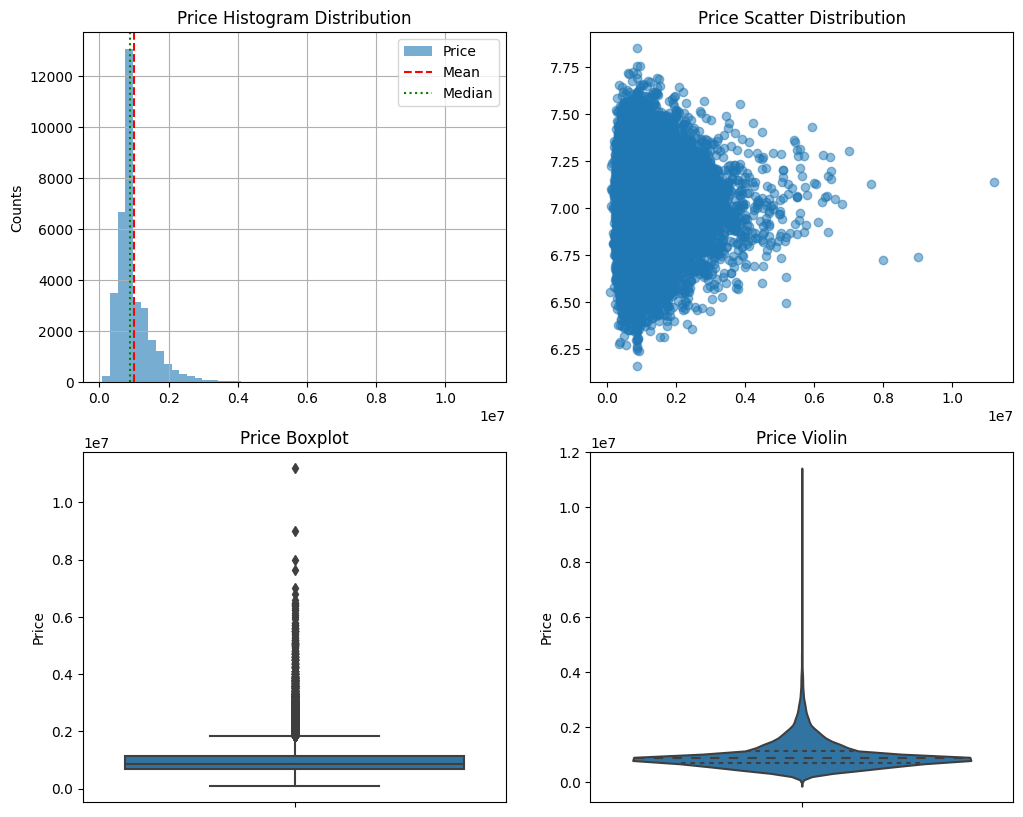

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df['Price'].hist(bins=50, label='Price', alpha=0.6)
plt.axvline(np.mean(df['Price']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df['Price']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Price Histogram Distribution");
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df['Price'], np.random.normal(7, 0.2, size=df.shape[0]), alpha=0.5)
plt.title("Price Scatter Distribution");

plt.subplot(2, 2, 3)
sns.boxplot(y="Price", data=df)
plt.title("Price Boxplot");

plt.subplot(2, 2, 4)
sns.violinplot(y="Price", data=df, inner="quartile", bw=0.2)
plt.title("Price Violin");

In [ ]:
y = df["Price"]
X = df.drop("Price", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,)

In [ ]:
print('Shape of x_train is {}'.format(X_train.shape))
print('Shape of x_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (27882, 20)
Shape of x_test is (6971, 20)
Shape of y_train is (27882,)
Shape of y_test is (6971,)


In [ ]:
models = [('Lasso', Lasso()),
          ('LinearRegression', LinearRegression()),
          ('Ridge', Ridge()),
          ('ElasticNet', ElasticNet()),
          ('KNeighborsRegressor', KNeighborsRegressor()),
          ('RandomForestRegressor',RandomForestRegressor()),
          ('GradientBoostingRegressor', GradientBoostingRegressor()),
          ('AdaBoostRegressor', AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2))]
#Gerekli Modellerin calistirilmasi

In [ ]:
model.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=1.2, loss='exponential', n_estimators=5,
                  random_state=2)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ 778245.36296001,  937915.68383234, 1036906.20931832, ...,
       1028399.63027084,  937915.68383234,  778245.36296001])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Evaluation Metrics icin eksik kutuphanelerin eklenmesi
for name, model in models:
    print(f'########## {name} ##########')
    print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
    print("MAE",(mean_absolute_error(y_test, y_pred)))
    print("MSE",(mean_squared_error(y_test, y_pred)))
    print("R2",(r2_score(y_test, y_pred)))
#Regression Algoritmalari icin Evaluation Metrics

########## Lasso ##########
RMSE 499852.26372780546
MAE 344610.4519257716
MSE 249852285553.81158
R2 0.2815440158915815
########## LinearRegression ##########
RMSE 499852.26372780546
MAE 344610.4519257716
MSE 249852285553.81158
R2 0.2815440158915815
########## Ridge ##########
RMSE 499852.26372780546
MAE 344610.4519257716
MSE 249852285553.81158
R2 0.2815440158915815
########## ElasticNet ##########
RMSE 499852.26372780546
MAE 344610.4519257716
MSE 249852285553.81158
R2 0.2815440158915815
########## KNeighborsRegressor ##########
RMSE 499852.26372780546
MAE 344610.4519257716
MSE 249852285553.81158
R2 0.2815440158915815
########## RandomForestRegressor ##########
RMSE 499852.26372780546
MAE 344610.4519257716
MSE 249852285553.81158
R2 0.2815440158915815
########## GradientBoostingRegressor ##########
RMSE 499852.26372780546
MAE 344610.4519257716
MSE 249852285553.81158
R2 0.2815440158915815
########## AdaBoostRegressor ##########
RMSE 499852.26372780546
MAE 344610.4519257716
MSE 24985228555

In [ ]:
#EREN KAYNAR
#Tek basima kendim arastirarak yaptim hocam. Yanlislarim icin simdiden ozur dilerim.